<a href="https://colab.research.google.com/github/rajesh0305/Machine_Learning_Assignment/blob/main/DataPreprocessing_Using_CoVarianceOf_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q. why we are doing the covariance of data matrix during Data Preprocessing?

Ans:This is because covariance matrix accounts for variability in the dataset, and variability of the dataset is a way to summarize how much information we have in the data (Imagine a variable with all same values as its observations, then the variance is 0, and intuitively speaking, there’s not too much information from this variable because every observation is the same). The diagonal elements of the covariance matrix stand for variability of each variable itself, and off-diagonal elements in covariance matrix represents how variables are correlated with each other.

Ultimately we want our transformed variables to contain as much as information (or equivalently, account for as much variability as possible).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = np.random.randint(100,200,size =(100,2))
df =pd.DataFrame(data,columns = ['height','weight'])
df.head()

,height,weight
0,183,115
1,111,128
2,108,144
3,154,167
4,154,186


In [4]:
df.shape

(100, 2)

In [5]:
print(df.describe())

           height      weight
count  100.000000  100.000000
mean   147.310000  149.510000
std     27.675864   28.712963
min    100.000000  101.000000
25%    125.500000  125.750000
50%    149.500000  147.500000
75%    169.250000  172.000000
max    197.000000  199.000000


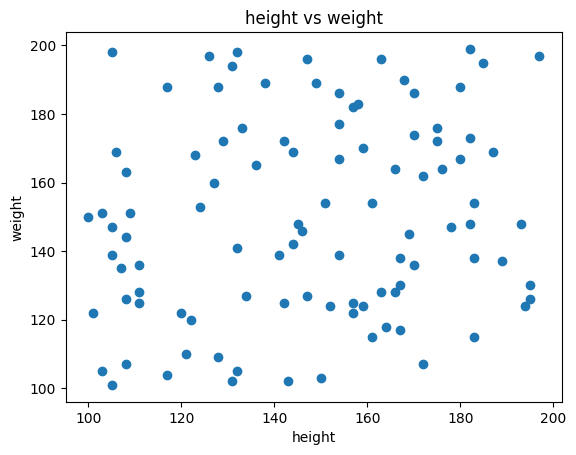

In [6]:
plt.scatter(df['height'],df['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height vs weight')
plt.show()

Fiestly we do the **Column Standardization** of tha dataSet.

In [8]:
mean1= df['height'].mean()
mean2 = df['weight'].mean()

std1 = df['height'].std()
std2 = df['weight'].std()

for i in range (len(df)):
  df['height'][i] = (df['height'][i]-mean1)/std1
  df['weight'][i] = (df['weight'][i]-mean2)/std2

df.head()

,height,weight
0,1.289571,-1.201896
1,-1.311974,-0.749139
2,-1.420371,-0.191899
3,0.241727,0.609133
4,0.241727,1.270855


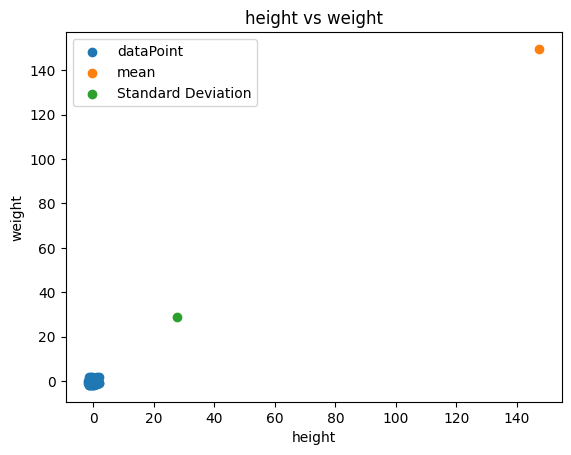

In [9]:
plt.scatter(df['height'],df['weight'],label = 'dataPoint')
plt.scatter(mean1,mean2,label = 'mean')
plt.scatter(std1,std2,label ='Standard Deviation')
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height vs weight')
plt.legend()
plt.show()

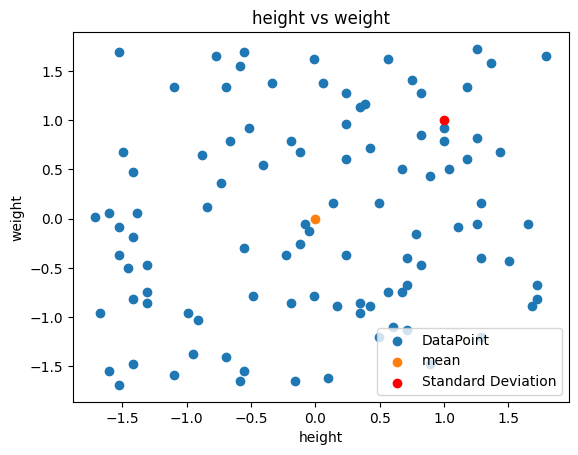

In [12]:
plt.scatter(df['height'],df['weight'],label ='DataPoint')
plt.scatter(df['height'].mean(),df['weight'].mean(),label = 'mean')
plt.scatter(df['height'].std(),df['weight'].std(),label = 'Standard Deviation',color = 'red')
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height vs weight')
plt.legend()
plt.show()

This is normal scatter plot between two feature like :height and weight

Now,We are going to apply the **Co-Variance of Data Matrix** concept.

Formula:[link text](https://)https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm

In [7]:
mean1 = df['height'].mean()
mean2 = df['weight'].mean()

def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

covariance =calculateCovariance(df)
print(covariance)

          height    weight
height  758.2939  133.4419
weight  133.4419  816.1899


This is the co-variance of the dataMatrix is =(d x d)

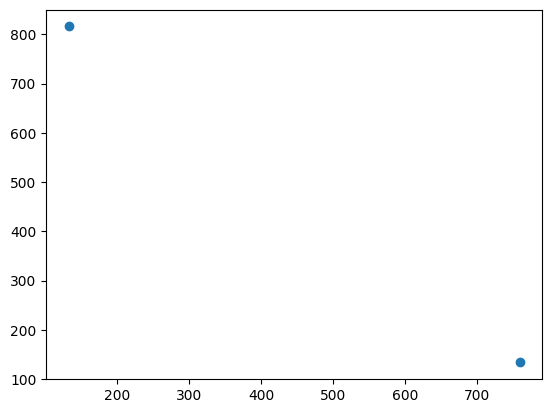

In [13]:
plt.scatter(covariance['height'],covariance['weight'],label = 'covariance')
plt.show()